In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("air-traffic-passenger-statistics.csv")

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
df["Boarding Area"]=df["Boarding Area"].map({"A":0,"B":1,"C":2,"D":3,"E":4,"F":5,"G":6})

In [6]:
df["Terminal"]=df["Terminal"].map({"Terminal 1":0,"International":1})

In [7]:
df["Price Category Code"]=df["Price Category Code"].map({"Low Fare":0,"Other":1})

In [8]:
x=df[["Boarding Area","Terminal","Price Category Code","Passenger Count"]]

In [9]:
x.head()

,Boarding Area,Terminal,Price Category Code,Passenger Count
0,1.0,0.0,0,27271
1,1.0,0.0,0,29131
2,1.0,0.0,0,5415
3,1.0,0.0,1,35156
4,1.0,0.0,1,34090


In [10]:
x.isnull().sum()

Boarding Area            27
Terminal               3312
Price Category Code       0
Passenger Count           0
dtype: int64

In [11]:
df["Boarding Area"]=df["Boarding Area"].fillna(df["Boarding Area"].mean())

In [12]:
df["Terminal"]=df["Terminal"].fillna(df["Terminal"].mean())

In [13]:
df["Boarding Area"]=df["Boarding Area"].astype("int64")

In [14]:
df["Terminal"]=df["Terminal"].astype("int64")

In [15]:
x.head()

,Boarding Area,Terminal,Price Category Code,Passenger Count
0,1.0,0.0,0,27271
1,1.0,0.0,0,29131
2,1.0,0.0,0,5415
3,1.0,0.0,1,35156
4,1.0,0.0,1,34090


In [16]:
x=df[["Boarding Area","Terminal","Price Category Code","Passenger Count"]]

In [17]:
model=KMeans(n_clusters=4)

In [18]:
model=model.fit(x)

In [19]:
tahmin=model.predict(x)

In [20]:
tahmin

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [21]:
x["cluster"]=tahmin

In [22]:
x.head()

,Boarding Area,Terminal,Price Category Code,Passenger Count,cluster
0,1,0,0,27271,0
1,1,0,0,29131,0
2,1,0,0,5415,0
3,1,0,1,35156,3
4,1,0,1,34090,0


In [23]:
silhouette_score(x,tahmin)

0.7860900810295485

In [27]:
import matplotlib.pyplot as plt

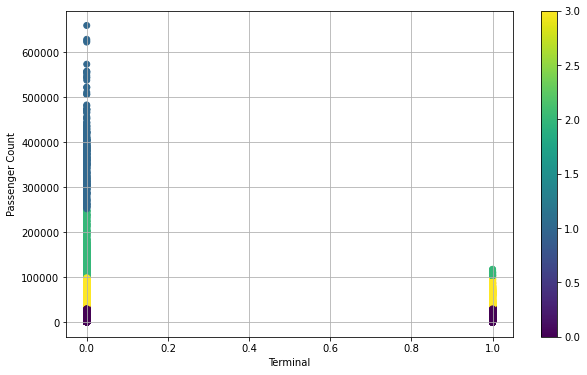

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(x["Terminal"],x["Passenger Count"],c=tahmin)
plt.xlabel("Terminal")
plt.ylabel("Passenger Count")
plt.colorbar()
plt.grid()

In [30]:
allscore=[]
allclusters=[]
uzakliklar=[]
def clust(kactane):
    for i in range(1,kactane+1):
        i=i+1
        model=KMeans(n_clusters=i)
        model=model.fit(x)
        tahmin=model.predict(x)
        score=silhouette_score(x,tahmin)
        uzaklik=model.inertia_
        print("Cluster ",i," score ",score)
        allscore.append(score)
        allclusters.append(i)
        uzakliklar.append(uzaklik)
clust(10)

Cluster  2  score  0.859646178858757
Cluster  3  score  0.8286158177660151
Cluster  4  score  0.7861058874913509
Cluster  5  score  0.7846347345180708
Cluster  6  score  0.6596661135521007
Cluster  7  score  0.6616987314431603
Cluster  8  score  0.644418151017132
Cluster  9  score  0.6404456798399952
Cluster  10  score  0.6161345048805769
Cluster  11  score  0.6110302593464676


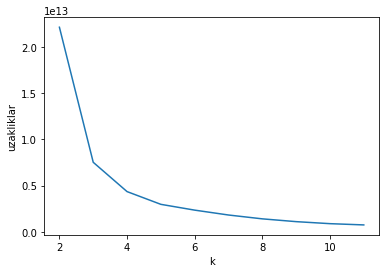

In [31]:
plt.xlabel("k")
plt.ylabel("uzakliklar")
plt.plot(allclusters,uzakliklar)

In [32]:
df[df["Passenger Count"]>3000]

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,0,0,1,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,0,0,1,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,0,0,1,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,1,0,1,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,1,0,1,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18875,201806,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Enplaned,1,1,0,18279
18878,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,1,1,0,9382
18879,201806,WOW Air,WW,WOW Air,WW,International,Europe,Deplaned,1,1,6,8989
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,1,1,0,10868
